# Load packages

In [38]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

# Load Iris from sklearn and rename columns as in the exercise notebook
URL for sklearn load_iris: [load_iris documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
More info for sklearn load_iris: [load_iris metadata](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

In [39]:
# Dictionary with column renaming
renaming_dict = {
    "sepal length (cm)": "SepalLengthCm",
    "sepal width (cm)": "SepalWidthCm",
    "petal length (cm)": "PetalLengthCm",
    "petal width (cm)": "PetalWidthCm",
}

# Check load_iris documentation
iris_df, iris_y = load_iris(return_X_y=True, as_frame=True)
iris_df = iris_df.rename(columns=renaming_dict)

# Remap class names from integers to strings

Pandas Series map documentation: [pandas.Series.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

In [40]:
# Class mapping dictionary
class_mapper = {
    0: "Iris-setosa",
    1: "Iris-versicolor",
    2: "Iris-virginica"
}

iris_df["Species"] = iris_y.map(class_mapper)
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Seaborn useful documentation:
[Seaborn histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html)
[Seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)
[Seaborn FacetGrid: map_dataframe](https://seaborn.pydata.org/generated/seaborn.FacetGrid.map_dataframe.html)
[Seaborn PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)

# Plot sepal-length in stacked bars

The `hue` parameter controls class separation


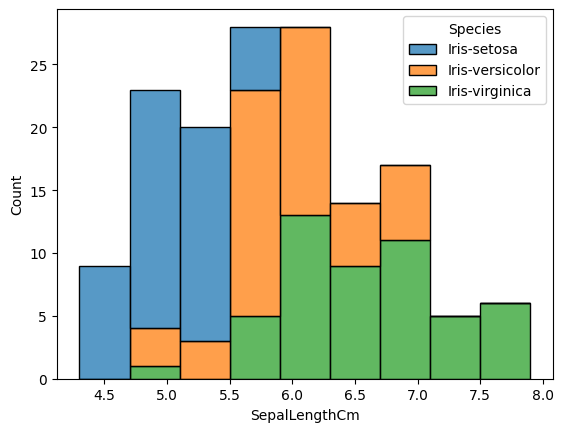

In [41]:
sns.histplot(data=iris_df,  x="SepalLengthCm", hue=iris_df["Species"], multiple="stack")
plt.show()

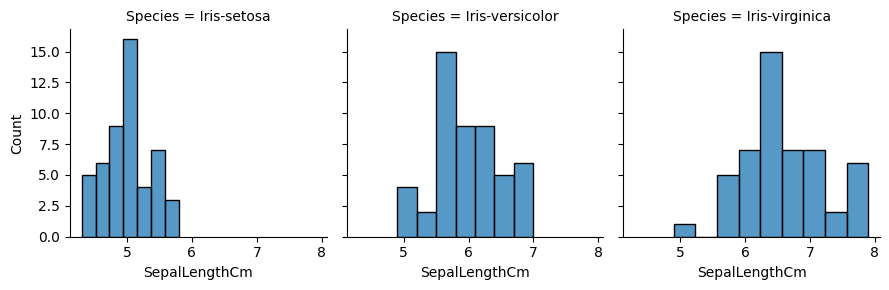

In [42]:
# Plot histogram of classes of sepal length dimension in three sub-plots
g = sns.FacetGrid(iris_df, col="Species")
g.map_dataframe(sns.histplot, "SepalLengthCm")

plt.show()

---


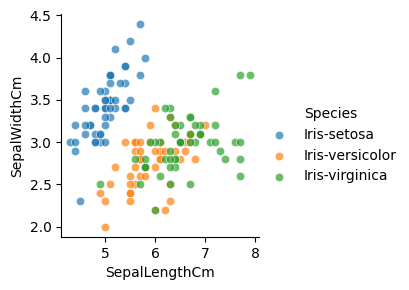

In [43]:
# Scatter plot between sepal length vs petal length
g = sns.FacetGrid(iris_df, hue="Species")
g.map_dataframe(sns.scatterplot, "SepalLengthCm", "SepalWidthCm", alpha=0.7)
g.add_legend()

plt.show()

# Plot histograms and scatter plots for all dimensions in one single figure

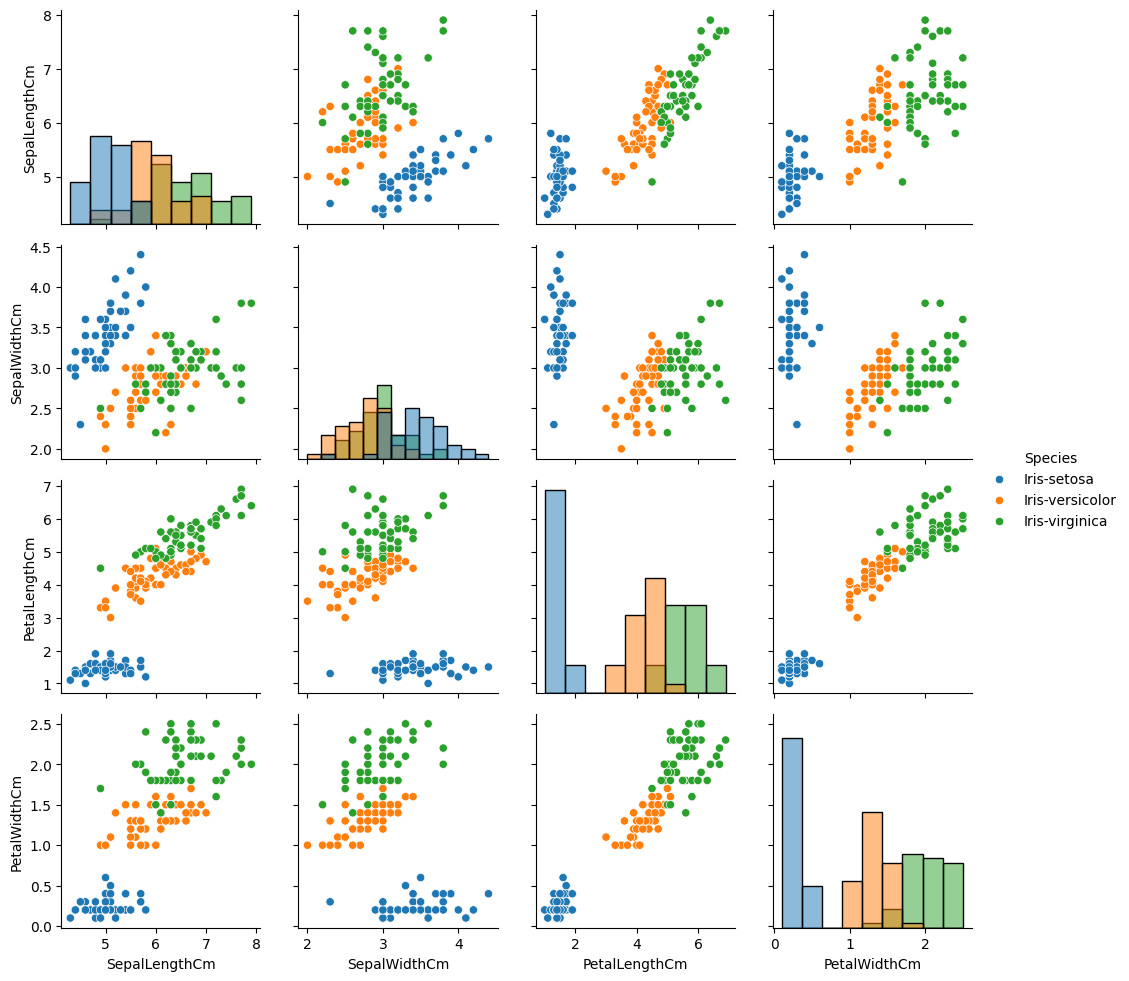

In [44]:
g = sns.PairGrid(iris_df, hue="Species")

g.map_diag(sns.histplot)  # Define plot for diagonal: histogram
g.map_offdiag(sns.scatterplot)  # Define plot for off-diagonal: scatterplot
g.add_legend()

plt.show()